Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. It aims to simplify the complexity of high-dimensional data by transforming it into a lower-dimensional space while retaining most of the important information.

Here's a more in-depth explanation of PCA:

1. **The Problem of High Dimensionality**: In many real-world applications, datasets often contain a large number of features or variables. High-dimensional data can pose several challenges, including increased computational complexity, the curse of dimensionality, and difficulties in visualization and interpretation.

2. **Goal of PCA**: PCA seeks to reduce the dimensionality of the data while preserving its essential structure. It does this by finding a new set of variables, called principal components, that capture the maximum amount of variance in the original data.

3. **Principal Components**: Principal components are linear combinations of the original variables. The first principal component is chosen in such a way that it explains the maximum amount of variance in the data. Subsequent principal components are orthogonal to the preceding ones and capture the remaining variance in decreasing order.

4. **Mathematical Formulation**: Let's say we have a dataset with \( m \) observations and \( n \) variables. PCA starts by centering the data (subtracting the mean from each variable) to remove any bias. Then, it computes the covariance matrix of the centered data. The eigenvectors and eigenvalues of this covariance matrix represent the directions and magnitudes of the principal components, respectively. The eigenvectors are ordered according to the corresponding eigenvalues, indicating the importance of each principal component.

5. **Dimensionality Reduction**: Once the principal components are determined, we can choose to retain only a subset of them that captures most of the variance in the data. This allows us to reduce the dimensionality of the dataset while retaining as much information as possible.

6. **Applications of PCA**:
   - **Visualization**: PCA can be used to visualize high-dimensional data in a lower-dimensional space, making it easier to explore and interpret.
   - **Data Compression**: By representing the data with fewer dimensions, PCA can reduce storage requirements and computational complexity.
   - **Feature Extraction**: PCA can be used as a preprocessing step to extract the most important features or patterns in the data before applying other machine learning algorithms.
   - **Noise Reduction**: PCA can help remove noise or irrelevant information from the data, improving the performance of subsequent analyses.

7. **Considerations**:
   - **Normalization**: It's important to normalize the data before applying PCA to ensure that variables with larger scales do not dominate the principal components.
   - **Interpretation**: While PCA simplifies the data, interpreting the principal components may not always be straightforward, especially when dealing with a large number of variables.

In summary, PCA is a powerful technique for dimensionality reduction that can help uncover the underlying structure in high-dimensional data, making it more manageable and easier to analyze.

Sure, here are the steps typically involved in Principal Component Analysis (PCA):

1. **Standardization**: Standardize the data by subtracting the mean and dividing by the standard deviation of each feature. This step ensures that all features have a mean of zero and a standard deviation of one, which is important for PCA to work properly, especially when features are measured in different units.

2. **Covariance Matrix Computation**: Compute the covariance matrix of the standardized data. The covariance matrix shows the relationship between every pair of features and helps identify the directions of maximum variance in the data.

3. **Eigenvalue Decomposition**: Perform eigenvalue decomposition on the covariance matrix to obtain its eigenvectors and eigenvalues. Eigenvectors represent the principal components (new feature axes), and eigenvalues represent the amount of variance explained by each principal component.

4. **Selection of Principal Components**: Decide how many principal components to retain based on the explained variance. This can be determined by looking at the cumulative explained variance ratio or by setting a threshold for the proportion of variance to retain.

5. **Projection**: Project the original data onto the selected principal components to obtain the new feature space. This is typically done by multiplying the standardized data by the matrix of selected eigenvectors.

These are the main steps involved in PCA. After performing PCA, the data is transformed into a new space where the first few principal components capture the most variance in the data, allowing for dimensionality reduction while preserving as much information as possible.

In [5]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Step 1: Standardization
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:

# Step 2: Compute the Covariance Matrix
cov_matrix = np.cov(scaled_X, rowvar=False)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [8]:


# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [9]:
len(eigenvectors)

4

In [10]:
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [12]:



# Step 4: Select Principal Components
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
sorted_eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

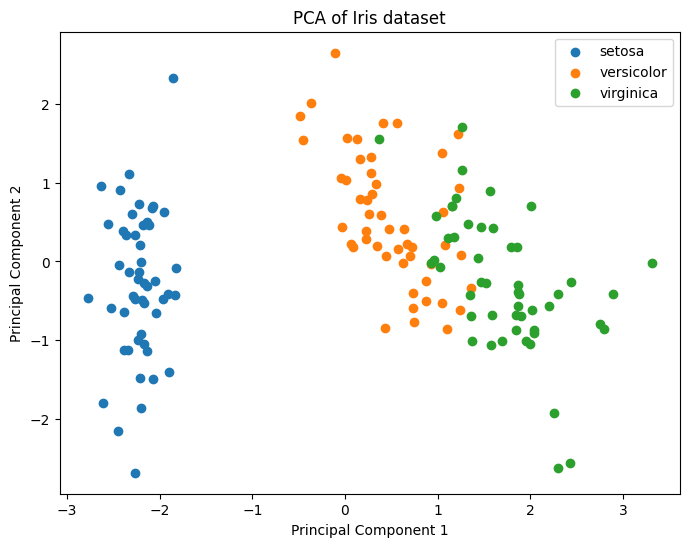

In [13]:



# Choose the top 2 eigenvectors (2 principal components)
k = 2
principal_components = sorted_eigenvectors[:, :k]

# Step 5: Project Data onto Principal Components
transformed_X = np.dot(scaled_X, principal_components)

# Plot the transformed data
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(transformed_X[y == i, 0], transformed_X[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris dataset')
plt.legend()
plt.show()


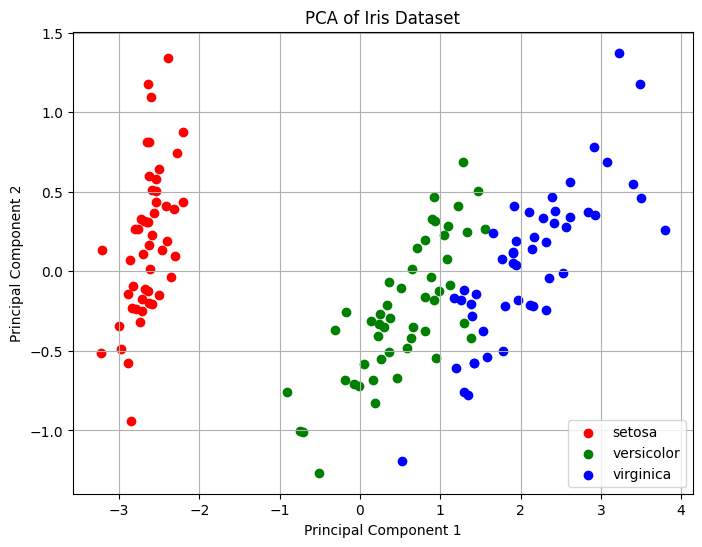

In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA
pca = PCA(n_components=2)  # We want to reduce the data to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plot the results
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8, 6))

for i in range(len(colors)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=colors[i], label=iris.target_names[i])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [3]:
import numpy as np

# Given array A
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Identity matrix
I = np.eye(A.shape[0])

# Solve for eigenvalues
eigenvalues = np.linalg.eigvals(A)

print("Eigenvalues:")
print(eigenvalues)


Eigenvalues:
[ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]


In [15]:
from keras.datasets import mnist

In [16]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [20]:
import numpy as np
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)